# LOADING THE DATA

In [0]:
import numpy as np
import pandas as pd
from google.colab import drive

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
import datetime
from sklearn.cluster import KMeans
from math import sin, cos, sqrt, atan2, radians
import geopy.distance

RANDOM_SEED = 6    # Set a random seed for reproducibility!

drive.mount('/content/drive/')
sns.set()

##testing feature

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
train = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/train.csv',index_col="tripid")
test  = pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/test.csv',index_col="tripid")
sub =  pd.read_csv('/content/drive/My Drive/Data Sets/ML data/details/sample_submission.csv',index_col="tripid")

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,correct
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,correct
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,correct


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [0]:
print(sub.info())
print(train.info())
print(train['label'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   prediction  8576 non-null   int64
dtypes: int64(1)
memory usage: 134.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 

In [0]:
cleanup_label = {"label":     {'correct': '1' , 'incorrect': '0'}}
train.replace(cleanup_label, inplace=True)
convert_dict = {'label': 'int64'}
train = train.astype(convert_dict) 
print(train['label'].value_counts())

train

1    15495
0     1681
Name: label, dtype: int64


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,1/31/2020 22:07,1/31/2020 22:21,7.29073,80.6367,7.28891,80.6557,198.26,1
213812756,10.5,2151.0,428.0,0.0000,39.0,1/31/2020 23:07,1/31/2020 23:43,6.90569,79.8516,6.95089,79.9389,581.23,1
213813930,10.5,263.0,9.0,0.0000,110.0,1/31/2020 23:21,1/31/2020 23:25,7.09210,79.9000,7.10135,79.9017,76.20,1


## create entire dataset

In [0]:
frames = [train, test]
dataset = pd.concat(frames)
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1.0
189125358,10.5,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1.0
189125719,10.5,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1.0
189127273,10.5,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1.0
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,NaN
222857785,10.5,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,NaN
222858416,10.5,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,NaN


In [0]:
dataset = dataset.drop_duplicates(keep='first')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 189123628 to 222860703
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            25547 non-null  float64
 1   duration                   25547 non-null  float64
 2   meter_waiting              25547 non-null  float64
 3   meter_waiting_fare         25547 non-null  float64
 4   meter_waiting_till_pickup  25547 non-null  float64
 5   pickup_time                25748 non-null  object 
 6   drop_time                  25748 non-null  object 
 7   pick_lat                   25748 non-null  float64
 8   pick_lon                   25748 non-null  float64
 9   drop_lat                   25748 non-null  float64
 10  drop_lon                   25748 non-null  float64
 11  fare                       25611 non-null  float64
 12  label                      17172 non-null  float64
dtypes: float64(11), object(2)
memory u

In [0]:
## handle NaN values
dataset = dataset.fillna(0)
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1.0
189125358,10.5,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1.0
189125719,10.5,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1.0
189127273,10.5,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1.0
189128020,0.0,0.0,0.0,0.00000,0.0,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,0.0
222857785,10.5,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,0.0
222858416,10.5,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,0.0


## Discretization

In [0]:
print(dataset['meter_waiting'].value_counts())
dataset['meter_waiting'].describe()

0.0         1228
10.0         546
20.0         420
30.0         353
40.0         274
            ... 
1118.0         1
2707.0         1
5718.0         1
43695.0        1
143291.0       1
Name: meter_waiting, Length: 2242, dtype: int64


count     25748.000000
mean        583.981630
std        7349.012632
min           0.000000
25%          31.000000
50%         120.000000
75%         342.000000
max      453650.000000
Name: meter_waiting, dtype: float64

## categorize continuous classes

In [0]:
print(train['additional_fare'].value_counts())
print(test['additional_fare'].value_counts())

10.50       14508
5.00         1211
40.50         336
60.50         271
30.50         268
110.50        109
21.00         102
80.50          38
55.00          21
11.00          21
0.00           14
20.50          14
35.00          14
25.00          11
85.50          11
105.00          5
81.00           4
75.00           3
210.50          2
221.00          2
80.00           2
111.00          1
61.00           1
91.50           1
70.50           1
450.82          1
10.00           1
12795.03        1
Name: additional_fare, dtype: int64
10.5     7753
5.0       488
30.5      270
40.5       36
25.0       10
60.5        6
85.5        4
35.0        3
110.5       3
0.0         2
160.5       1
Name: additional_fare, dtype: int64


In [0]:
dataset['additional_fare'].value_counts()

10.50       22258
5.00         1699
30.50         538
40.50         372
60.50         277
0.00          217
110.50        112
21.00         102
80.50          38
25.00          21
55.00          21
11.00          21
35.00          17
85.50          15
20.50          14
105.00          5
81.00           4
75.00           3
221.00          2
80.00           2
210.50          2
61.00           1
450.82          1
12795.03        1
91.50           1
160.50          1
10.00           1
70.50           1
111.00          1
Name: additional_fare, dtype: int64

In [0]:
cleanup_nums = {"additional_fare":     {10.50: '1' , 5.00: '2',30.50: '3',40.50: '4',60.50: '5',110.50: '6',21.00: '7',80.50: '8',
                                        25.00: '9',55.00: '10',11.00: '11',35.00: '12',0.00: '13',85.50: '14',20.50: '15',105.00: '16',
                                        81.00: '17',75.00: '18',210.50: '19',80.00: '20',221.00: '21',450.82: '22',111.00: '23',
                                        70.50: '24',91.50: '25',160.50: '26',10.00: '27',12795.03: '28',61.00: '29'}}
dataset.replace(cleanup_nums, inplace=True)
dataset['additional_fare'].value_counts()

1     22258
2      1699
3       538
4       372
5       277
13      217
6       112
7       102
8        38
9        21
11       21
10       21
12       17
14       15
15       14
16        5
17        4
18        3
19        2
20        2
21        2
26        1
24        1
22        1
25        1
29        1
28        1
23        1
27        1
Name: additional_fare, dtype: int64

## location clustering using KMean(elbow curve)

### pickup clustering

In [0]:
pickup_location = dataset[['pick_lat','pick_lon']]   #pick_lat	pick_lon
drop_location = dataset[['drop_lat','drop_lon']]  #drop_lat	drop_lon
pickup_location

,pick_lat,pick_lon
tripid,,
189123628,6.86252,79.8993
189125358,6.88589,79.8984
189125719,6.90839,79.8651
189127273,6.92570,79.8895
189128020,6.87441,79.8615
...,...,...
222856243,6.85103,79.9567
222857785,6.91293,79.9656
222858416,6.85718,79.9081


In [0]:
dataset.columns[7:9]

Index(['pick_lat', 'pick_lon'], dtype='object')

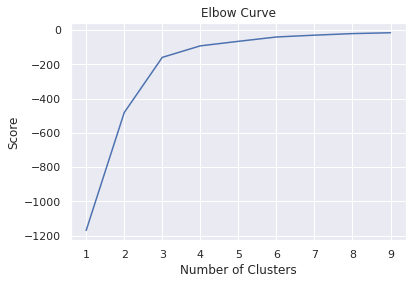

In [0]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataset[['pick_lat']]
X_axis = dataset[['pick_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [0]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(pickup_location[pickup_location.columns[0:2]]) # Compute k-means clustering.
dataset['pick_location_cluster'] = kmeans.fit_predict(pickup_location[pickup_location.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(pickup_location[pickup_location.columns[0:2]]) # Labels of each point
print(dataset['pick_location_cluster'].value_counts())
dataset

0    21742
1     3554
2      452
Name: pick_location_cluster, dtype: int64


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pick_location_cluster
tripid,,,,,,,,,,,,,,
189123628,1,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1.0,0
189125358,1,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1.0,0
189125719,1,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1.0,0
189127273,1,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0
189128020,13,0.0,0.0,0.00000,0.0,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,1,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,0.0,0
222857785,1,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,0.0,0
222858416,1,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,0.0,0


### drop clustering

In [0]:
dataset.columns[9:11]

Index(['drop_lat', 'drop_lon'], dtype='object')

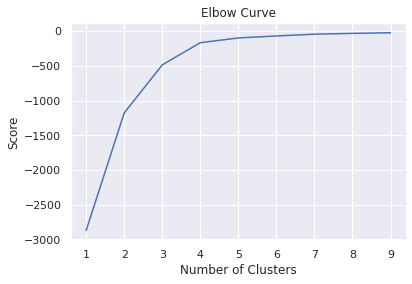

In [0]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataset[['drop_lat']]
X_axis = dataset[['drop_lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#When we graph the plot, we see that the graph levels off slowly after 3 clusters. This implies that addition of more clusters will not help us that much.

In [0]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(drop_location[drop_location.columns[0:2]]) # Compute k-means clustering.
dataset['drop_location_cluster'] = kmeans.fit_predict(drop_location[drop_location.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(drop_location[drop_location.columns[0:2]]) # Labels of each point
print(dataset['drop_location_cluster'].value_counts())
dataset

0    22191
2     3556
1        1
Name: drop_location_cluster, dtype: int64


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pick_location_cluster,drop_location_cluster
tripid,,,,,,,,,,,,,,,
189123628,1,834.0,56.0,0.00000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1.0,0,0
189125358,1,791.0,47.0,0.00000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1.0,0,0
189125719,1,1087.0,80.0,0.00000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1.0,0,0
189127273,1,598.0,271.0,15.66380,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0,0
189128020,13,0.0,0.0,0.00000,0.0,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,1,1723.0,429.0,24.83332,3.0,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48,0.0,0,0
222857785,1,1378.0,80.0,0.00000,125.0,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85,0.0,0,0
222858416,1,418.0,56.0,3.28440,93.0,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79,0.0,0,0


## Date and Time

### pickup and drop

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25748 entries, 189123628 to 222860703
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            25748 non-null  object 
 1   duration                   25748 non-null  float64
 2   meter_waiting              25748 non-null  float64
 3   meter_waiting_fare         25748 non-null  float64
 4   meter_waiting_till_pickup  25748 non-null  float64
 5   pickup_time                25748 non-null  object 
 6   drop_time                  25748 non-null  object 
 7   pick_lat                   25748 non-null  float64
 8   pick_lon                   25748 non-null  float64
 9   drop_lat                   25748 non-null  float64
 10  drop_lon                   25748 non-null  float64
 11  fare                       25748 non-null  float64
 12  label                      25748 non-null  float64
 13  pick_location_cluster      25748 n

In [0]:
pickup_date_time = dataset[["pickup_time"]]
print("pickup_date_time.shape", pickup_date_time.shape)
pickup_date_time.head()

pickup_date_time.shape (25748, 1)


,pickup_time
tripid,
189123628,11/1/2019 0:20
189125358,11/1/2019 0:56
189125719,11/1/2019 1:08
189127273,11/1/2019 2:27
189128020,11/1/2019 3:34


In [0]:
drop_date_time = dataset[["drop_time"]]
print("drop_date_time.shape", drop_date_time.shape)
drop_date_time.head()

drop_date_time.shape (25748, 1)


,drop_time
tripid,
189123628,11/1/2019 0:34
189125358,11/1/2019 1:09
189125719,11/1/2019 1:26
189127273,11/1/2019 2:37
189128020,11/1/2019 3:51


In [0]:
dataset['pickup_time'] = dataset['pickup_time'].astype('datetime64[ns]')
dataset['drop_time'] = dataset['drop_time'].astype('datetime64[ns]')


dataset['year'] = dataset.pickup_time.dt.year

dataset['month'] = dataset.pickup_time.dt.month

dataset['day'] =dataset.pickup_time.dt.day

dataset['pickup_hour'] = dataset.pickup_time.dt.hour

dataset['pickup_min'] = dataset.pickup_time.dt.minute

dataset['drop_hour'] = dataset.drop_time.dt.hour

dataset['drop_min'] = dataset.drop_time.dt.minute

In [0]:
weekDays = (1,2,3,4,5,6,7)
date_name_dict = {}
for ind in dataset.index:
  year =  dataset['year'][ind].astype(np.int64)
  month =  dataset['month'][ind].astype(np.int64)
  day =  dataset['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  dayAsString = weekDays[date_Day]
  date_name_dict[ind] = dayAsString
  

In [0]:
dataset['weekday'] = dataset.index.to_series().map(date_name_dict)

## Distance calculate

In [0]:
train_distance_dict = {}

for ind in dataset.index:
  pickup_lat = dataset['pick_lat'][ind]
  pickup_long = dataset['pick_lon'][ind]
  drop_lat = dataset['drop_lat'][ind]
  drop_long = dataset['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  train_distance_dict[ind] = distance

In [0]:
dataset['distance_val'] = dataset.index.to_series().map(train_distance_dict)

## Split dataset to train and test

In [0]:
test = dataset.loc[213284604:222860703]
test = test.drop(['label'], axis=1)


In [0]:
train = dataset.loc[189123628:213817296]
convert_dict = {'label': 'int64'}
train = train.astype(convert_dict) 


In [0]:
dataset

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,pick_location_cluster,drop_location_cluster,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,,,
189123628,1,834.0,56.0,0.00000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,1.0,0,0,2019,11,1,0,20,0,34,5,5.072065
189125358,1,791.0,47.0,0.00000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,1.0,0,0,2019,11,1,0,56,1,9,5,3.151780
189125719,1,1087.0,80.0,0.00000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,1.0,0,0,2019,11,1,1,8,1,26,5,6.302418
189127273,1,598.0,271.0,15.66380,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,1.0,0,0,2019,11,1,2,27,2,37,5,0.862654
189128020,13,0.0,0.0,0.00000,0.0,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,358.39,1.0,0,0,2019,11,1,3,34,3,51,5,8.148521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,1,1723.0,429.0,24.83332,3.0,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,0.0,0,0,2020,3,16,21,28,21,56,1,3.938380
222857785,1,1378.0,80.0,0.00000,125.0,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,0.0,0,0,2020,3,16,21,59,22,22,1,7.525493
222858416,1,418.0,56.0,3.28440,93.0,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,0.0,0,0,2020,3,16,22,2,22,9,1,2.046036


## Setup data to train model

In [0]:
train_features = train[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare','pick_location_cluster','drop_location_cluster',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]
print(train_features.info())
train_features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17172 non-null  object 
 1   duration                   17172 non-null  float64
 2   meter_waiting              17172 non-null  float64
 3   meter_waiting_fare         17172 non-null  float64
 4   meter_waiting_till_pickup  17172 non-null  float64
 5   fare                       17172 non-null  float64
 6   pick_location_cluster      17172 non-null  int32  
 7   drop_location_cluster      17172 non-null  int32  
 8   year                       17172 non-null  int64  
 9   month                      17172 non-null  int64  
 10  pickup_hour                17172 non-null  int64  
 11  pickup_min                 17172 non-null  int64  
 12  drop_hour                  17172 non-null  int64  
 13  drop_min                   17172 n

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pick_location_cluster,drop_location_cluster,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,
189123628,1,834.0,56.0,0.0000,64.0,270.32,0,0,2019,11,0,20,0,34,5,5.072065
189125358,1,791.0,47.0,0.0000,134.0,197.85,0,0,2019,11,0,56,1,9,5,3.151780
189125719,1,1087.0,80.0,0.0000,61.0,301.64,0,0,2019,11,1,8,1,26,5,6.302418
189127273,1,598.0,271.0,15.6638,68.0,82.30,0,0,2019,11,2,27,2,37,5,0.862654
189128020,13,0.0,0.0,0.0000,0.0,358.39,0,0,2019,11,3,34,3,51,5,8.148521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,1,838.0,93.0,5.4219,451.0,198.26,1,2,2020,1,22,7,22,21,5,2.107720
213812756,1,2151.0,428.0,0.0000,39.0,581.23,0,0,2020,1,23,7,23,43,5,10.865770
213813930,1,263.0,9.0,0.0000,110.0,76.20,0,0,2020,1,23,21,23,25,5,1.040065


In [0]:
train_lable = train[['label']]
print(train_lable.info())
train_lable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   17172 non-null  int64
dtypes: int64(1)
memory usage: 268.3 KB
None


,label
tripid,
189123628,1
189125358,1
189125719,1
189127273,1
189128020,1
...,...
213803193,1
213812756,1
213813930,1


In [0]:
test_features = test[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare','pick_location_cluster','drop_location_cluster',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]

print(test_features.info())
test_features


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   object 
 1   duration                   8576 non-null   float64
 2   meter_waiting              8576 non-null   float64
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   float64
 5   fare                       8576 non-null   float64
 6   pick_location_cluster      8576 non-null   int32  
 7   drop_location_cluster      8576 non-null   int32  
 8   year                       8576 non-null   int64  
 9   month                      8576 non-null   int64  
 10  pickup_hour                8576 non-null   int64  
 11  pickup_min                 8576 non-null   int64  
 12  drop_hour                  8576 non-null   int64  
 13  drop_min                   8576 non

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pick_location_cluster,drop_location_cluster,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,
213284604,1,924.0,42.0,2.44860,148.0,289.27,0,0,2020,2,0,38,0,53,6,6.670189
213286352,1,4249.0,20.0,0.00000,91.0,1912.70,0,0,2020,2,1,2,2,13,6,41.351053
213293973,1,1552.0,255.0,2.65880,23.0,394.00,0,0,2020,2,5,2,5,28,6,5.920044
213294622,1,462.0,16.0,0.00000,198.0,154.32,0,0,2020,2,5,30,5,38,6,3.283813
213298687,1,814.0,392.0,12.36920,69.0,147.47,0,0,2020,2,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,1,1723.0,429.0,24.83332,3.0,388.48,0,0,2020,3,21,28,21,56,1,3.938380
222857785,1,1378.0,80.0,0.00000,125.0,379.85,0,0,2020,3,21,59,22,22,1,7.525493
222858416,1,418.0,56.0,3.28440,93.0,112.79,0,0,2020,3,22,2,22,9,1,2.046036


## Model

In [0]:
#XGBoost for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from statistics import *
from numpy import mean

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

counter = Counter(train_lable['label'])
print(counter)

Counter({1: 15495, 0: 1677})


In [0]:
#The scale_pos_weight value is used to scale the gradient for the positive class.
#scale_pos_weight = total_negative_examples / total_positive_examples
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 0.108


In [0]:
tf = train_features.to_numpy()
tl = train_lable.to_numpy()

In [0]:
# define grid
model = XGBClassifier()
weights = [0.35,0.355,0.358,0.359, 0.3605,0.3609,0.3615, 0.3618, 0.362]
param_grid = dict(scale_pos_weight=weights)

In [0]:
# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
#grid_result = grid.fit(tf, tl)
# report the best configuration
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

In [0]:
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pick_location_cluster,drop_location_cluster,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,
189123628,1,834.0,56.0,0.0000,64.0,270.32,0,0,2019,11,0,20,0,34,5,5.072065
189125358,1,791.0,47.0,0.0000,134.0,197.85,0,0,2019,11,0,56,1,9,5,3.151780
189125719,1,1087.0,80.0,0.0000,61.0,301.64,0,0,2019,11,1,8,1,26,5,6.302418
189127273,1,598.0,271.0,15.6638,68.0,82.30,0,0,2019,11,2,27,2,37,5,0.862654
189128020,13,0.0,0.0,0.0000,0.0,358.39,0,0,2019,11,3,34,3,51,5,8.148521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,1,838.0,93.0,5.4219,451.0,198.26,1,2,2020,1,22,7,22,21,5,2.107720
213812756,1,2151.0,428.0,0.0000,39.0,581.23,0,0,2020,1,23,7,23,43,5,10.865770
213813930,1,263.0,9.0,0.0000,110.0,76.20,0,0,2020,1,23,21,23,25,5,1.040065


In [0]:
#print(train_features['additional_fare'].value_counts())
#print(test_features['additional_fare'].value_counts())

In [0]:
convert_dict2 = {'additional_fare': 'int64'}
train_features = train_features.astype(convert_dict2) 
convert_dict2 = {'additional_fare': 'int64'}
test_features = test_features.astype(convert_dict2) 

In [0]:
print(train_features.info())
print(test_features.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            17172 non-null  int64  
 1   duration                   17172 non-null  float64
 2   meter_waiting              17172 non-null  float64
 3   meter_waiting_fare         17172 non-null  float64
 4   meter_waiting_till_pickup  17172 non-null  float64
 5   fare                       17172 non-null  float64
 6   pick_location_cluster      17172 non-null  int32  
 7   drop_location_cluster      17172 non-null  int32  
 8   year                       17172 non-null  int64  
 9   month                      17172 non-null  int64  
 10  pickup_hour                17172 non-null  int64  
 11  pickup_min                 17172 non-null  int64  
 12  drop_hour                  17172 non-null  int64  
 13  drop_min                   17172 n

In [0]:
train_lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17172 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   17172 non-null  int64
dtypes: int64(1)
memory usage: 268.3 KB


## Cal Accuracy to check overfitting

In [0]:
import xgboost as xgb

X_train, X_test, y_train, y_test= train_test_split(train_features, train_lable,
test_size=0.2, random_state=123)

xg_cl = xgb.XGBClassifier(objective='binary:logistic',
n_estimators=10, seed=123)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
preds=preds.reshape(3435,1)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))


accuracy: 0.925182


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
xg_cls = xgb.XGBClassifier(objective='binary:logistic',
n_estimators=10, seed=123)
xg_cls.fit(train_features, train_lable)
pred_s = xg_cls.predict(test_features)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
print(test_features.info())
test_features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   int64  
 1   duration                   8576 non-null   float64
 2   meter_waiting              8576 non-null   float64
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   float64
 5   fare                       8576 non-null   float64
 6   pick_location_cluster      8576 non-null   int32  
 7   drop_location_cluster      8576 non-null   int32  
 8   year                       8576 non-null   int64  
 9   month                      8576 non-null   int64  
 10  pickup_hour                8576 non-null   int64  
 11  pickup_min                 8576 non-null   int64  
 12  drop_hour                  8576 non-null   int64  
 13  drop_min                   8576 non

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,pick_location_cluster,drop_location_cluster,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,
213284604,1,924.0,42.0,2.44860,148.0,289.27,0,0,2020,2,0,38,0,53,6,6.670189
213286352,1,4249.0,20.0,0.00000,91.0,1912.70,0,0,2020,2,1,2,2,13,6,41.351053
213293973,1,1552.0,255.0,2.65880,23.0,394.00,0,0,2020,2,5,2,5,28,6,5.920044
213294622,1,462.0,16.0,0.00000,198.0,154.32,0,0,2020,2,5,30,5,38,6,3.283813
213298687,1,814.0,392.0,12.36920,69.0,147.47,0,0,2020,2,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,1,1723.0,429.0,24.83332,3.0,388.48,0,0,2020,3,21,28,21,56,1,3.938380
222857785,1,1378.0,80.0,0.00000,125.0,379.85,0,0,2020,3,21,59,22,22,1,7.525493
222858416,1,418.0,56.0,3.28440,93.0,112.79,0,0,2020,3,22,2,22,9,1,2.046036


In [0]:
index=[]
for ind in test_features.index:
  index.append(ind)

test_features['tripid'] = index

submission = pd.DataFrame({
        "tripid": test_features["tripid"],
        "prediction": pred_s
    })
submission = submission.drop(['tripid'],1)
test_features = test_features.drop(['tripid'],1)
print(submission['prediction'].value_counts())
submission

1    8461
0     115
Name: prediction, dtype: int64


,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


## Sace model 1

In [0]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub4_1st_XGBOOST.csv'
submission.to_csv(sub_path, index=True)
print('Completed!')

Completed!


score - 0.96709

## cross validation

In [0]:

churn_dmatrix = xgb.DMatrix(data=train_features,
label=train_lable)
params={"objective":"binary:logistic","max_depth":4}
cv_results = xgb.cv(dtrain=churn_dmatrix, params=params, nfold=4,
num_boost_round=10, metrics="error", as_pandas=True)
print("Accuracy: %f" %((1-cv_results["test-error-mean"]).iloc[-1]))


Accuracy: 0.939087


## Train

In [0]:
xgb_model = XGBClassifier(scale_pos_weight=0.35)
# fit the model with the training data
xgb_model.fit(train_features,train_lable)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.35, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
predict_test = xgb_model.predict(test_features)

In [0]:
index=[]
for ind in test_features.index:
  index.append(ind)

test_features['tripid'] = index

sub = pd.DataFrame({
        "tripid": test_features["tripid"],
        "prediction": predict_test
    })
sub = sub.drop(['tripid'],1)
test_features = test_features.drop(['tripid'],1)
print(sub['prediction'].value_counts())
sub

1    8202
0     374
Name: prediction, dtype: int64


,prediction
tripid,
213284604,1
213286352,1
213293973,1
213294622,1
213298687,1
...,...
222856243,1
222857785,1
222858416,1


In [0]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub5_2nd_XGBOOST.csv'
sub.to_csv(sub_path, index=True)
print('Completed!')

Completed!


score - 0.97551

# old (need to modify)

In [0]:
print("train.shape", train.shape)
train.head()

train.shape (17176, 13)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.00000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.65880,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.00000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.36920,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47
...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,3/16/2020 21:28,3/16/2020 21:56,6.85103,79.9567,6.85588,79.9214,388.48
222857785,10.5,1378,80,0.00000,125,3/16/2020 21:59,3/16/2020 22:22,6.91293,79.9656,6.92112,79.8980,379.85
222858416,10.5,418,56,3.28440,93,3/16/2020 22:02,3/16/2020 22:09,6.85718,79.9081,6.83868,79.9083,112.79


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
print("test.shape", test.shape)
test.head()

test.shape (8576, 12)


,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
tripid,,,,,,,,,,,,
213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8576 entries, 213284604 to 222860703
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            8576 non-null   float64
 1   duration                   8576 non-null   int64  
 2   meter_waiting              8576 non-null   int64  
 3   meter_waiting_fare         8576 non-null   float64
 4   meter_waiting_till_pickup  8576 non-null   int64  
 5   pickup_time                8576 non-null   object 
 6   drop_time                  8576 non-null   object 
 7   pick_lat                   8576 non-null   float64
 8   pick_lon                   8576 non-null   float64
 9   drop_lat                   8576 non-null   float64
 10  drop_lon                   8576 non-null   float64
 11  fare                       8576 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 871.0+ KB


In [0]:
train.dtypes

additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                         object
dtype: object

In [0]:
labels = train[["label"]]
print("labels.shape", labels.shape)
labels.head()


labels.shape (17176, 1)


,label
tripid,
189123628,correct
189125358,correct
189125719,correct
189127273,correct
189128020,correct


In [0]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   17176 non-null  object
dtypes: object(1)
memory usage: 268.4+ KB


In [0]:
np.testing.assert_array_equal(train.index.values, labels.index.values)

In [0]:
train.isnull().sum()

additional_fare              202
duration                     202
meter_waiting                202
meter_waiting_fare           202
meter_waiting_till_pickup    202
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [0]:
test.isnull().sum()

additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
dtype: int64

In [0]:
labels.isnull().sum()

label    0
dtype: int64

# EXPLORING THE DATA

## Lables

In [0]:
fig, ax = plt.subplots(1, 1, sharex=True)

n_obs = labels.shape[0] #number of rows
print(n_obs)

(labels['label']
    .value_counts()
    .div(n_obs)
    .plot.barh(title="Proportion of label", ax=ax) 
)
ax.set_ylabel("Label")

fig.tight_layout()


In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="duration",y="fare",fit_reg=False,ci=None,truncate=True,data=train)

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17176 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16974 non-null  float64
 1   duration                   16974 non-null  float64
 2   meter_waiting              16974 non-null  float64
 3   meter_waiting_fare         16974 non-null  float64
 4   meter_waiting_till_pickup  16974 non-null  float64
 5   pickup_time                17176 non-null  object 
 6   drop_time                  17176 non-null  object 
 7   pick_lat                   17176 non-null  float64
 8   pick_lon                   17176 non-null  float64
 9   drop_lat                   17176 non-null  float64
 10  drop_lon                   17176 non-null  float64
 11  fare                       17039 non-null  float64
 12  label                      17176 non-null  object 
dtypes: float64(10), object(3)
memory u

In [0]:
train = train.dropna(subset=['duration','fare'])

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 189123628 to 213817296
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   pickup_time                16968 non-null  object 
 6   drop_time                  16968 non-null  object 
 7   pick_lat                   16968 non-null  float64
 8   pick_lon                   16968 non-null  float64
 9   drop_lat                   16968 non-null  float64
 10  drop_lon                   16968 non-null  float64
 11  fare                       16968 non-null  float64
 12  label                      16968 non-null  object 
dtypes: float64(10), object(3)
memory u

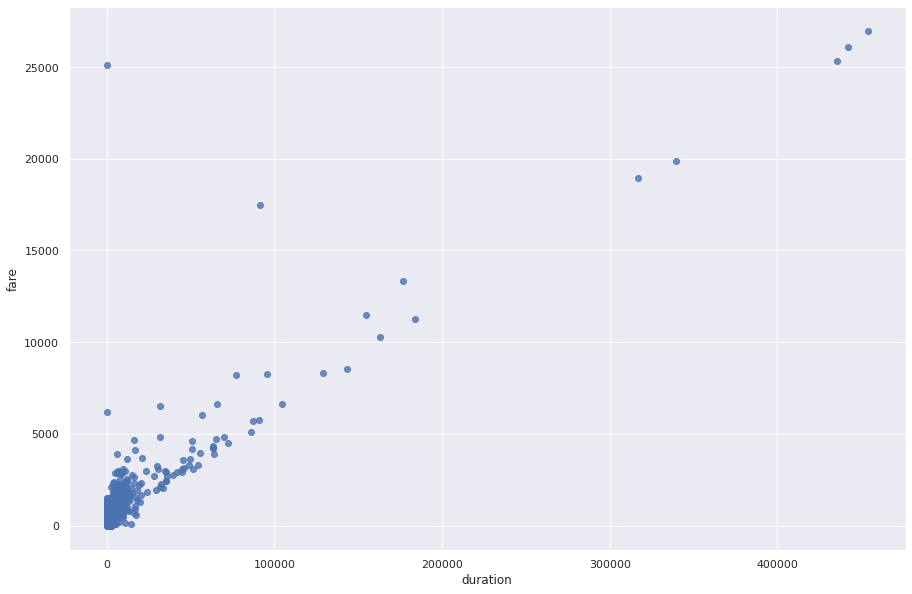

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(15,10)
ax = sns.regplot(x="duration",y="fare",fit_reg=False,ci=None,truncate=True,data=train)

In [0]:
train.nlargest(5, ['fare'])

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
tripid,,,,,,,,,,,,,
210573839,10.50,453872.0,453650.0,26198.6014,361.0,1/18/2020 10:10,1/23/2020 16:14,6.75240,79.9796,6.67566,79.9210,26945.99,correct
195593822,10.50,442190.0,431741.0,24954.6298,7.0,11/28/2019 12:36,12/3/2019 15:26,6.89518,79.8530,6.92415,79.8628,26098.75,incorrect
192121471,10.50,435397.0,435308.0,25098.4362,39.0,11/15/2019 9:39,11/20/2019 10:35,6.88741,79.8631,6.89370,79.8705,25315.09,incorrect
209365576,12795.03,40.0,210164.0,12252.5612,182.0,1/16/2020 5:29,1/16/2020 5:29,7.15515,79.8718,7.15537,79.8799,25097.59,incorrect
194554416,10.50,339351.0,339312.0,19570.7332,44.0,11/24/2019 11:21,11/28/2019 9:37,6.93536,79.9377,6.91406,79.8894,19865.46,incorrect


## **time day**

In [0]:
# import datetime class from datetime module
import datetime
train = train.drop_duplicates(keep='first')

In [0]:
pickup_date_time = train[["pickup_time"]]
print("pickup_date_time.shape", pickup_date_time.shape)
pickup_date_time.head()

pickup_date_time.shape (16965, 1)


,pickup_time
tripid,
189123628,11/1/2019 0:20
189125358,11/1/2019 0:56
189125719,11/1/2019 1:08
189127273,11/1/2019 2:27
189129552,11/1/2019 5:38


In [0]:
drop_date_time = train[["drop_time"]]
print("drop_date_time.shape", drop_date_time.shape)
drop_date_time.head()

drop_date_time.shape (16965, 1)


,drop_time
tripid,
189123628,11/1/2019 0:34
189125358,11/1/2019 1:09
189125719,11/1/2019 1:26
189127273,11/1/2019 2:37
189129552,11/1/2019 6:35


In [0]:
train['pickup_time'] = train['pickup_time'].astype('datetime64[ns]')
train['drop_time'] = train['drop_time'].astype('datetime64[ns]')


train['year'] = train.pickup_time.dt.year

train['month'] = train.pickup_time.dt.month

train['day'] =train.pickup_time.dt.day

train['pickup_hour'] = train.pickup_time.dt.hour

train['pickup_min'] = train.pickup_time.dt.minute

train['drop_hour'] = train.drop_time.dt.hour

train['drop_min'] = train.drop_time.dt.minute




In [0]:
weekDays = (1,2,3,4,5,6,7)
date_name_dict = {}
for ind in train.index:
  year =  train['year'][ind].astype(np.int64)
  month =  train['month'][ind].astype(np.int64)
  day =  train['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  dayAsString = weekDays[date_Day]
  date_name_dict[ind] = dayAsString
  


In [0]:
train['weekday'] = train.index.to_series().map(date_name_dict)
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday
tripid,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5


In [0]:
test['pickup_time'] = test['pickup_time'].astype('datetime64[ns]')
test['drop_time'] = test['drop_time'].astype('datetime64[ns]')


test['year'] = test.pickup_time.dt.year

test['month'] = test.pickup_time.dt.month

test['day'] =test.pickup_time.dt.day

test['pickup_hour'] = test.pickup_time.dt.hour

test['pickup_min'] = test.pickup_time.dt.minute

test['drop_hour'] = test.drop_time.dt.hour

test['drop_min'] = test.drop_time.dt.minute

In [0]:
weekDays = (1,2,3,4,5,6,7)
test_date_name_dict = {}
for ind in test.index:
  year =  test['year'][ind].astype(np.int64)
  month =  test['month'][ind].astype(np.int64)
  day =  test['day'][ind].astype(np.int64)
  date_obj = datetime.date(year,month,day)
  date_Day  = date_obj.weekday()
  dayAsString = weekDays[date_Day]
  test_date_name_dict[ind] = dayAsString

In [0]:
test['weekday'] = test.index.to_series().map(test_date_name_dict)
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday
tripid,,,,,,,,,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27,2020,2,1,0,38,0,53,6
213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70,2020,2,1,1,2,2,13,6
213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00,2020,2,1,5,2,5,28,6
213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32,2020,2,1,5,30,5,38,6
213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47,2020,2,1,7,0,7,14,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,2020,3,16,21,28,21,56,1
222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,2020,3,16,21,59,22,22,1
222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,2020,3,16,22,2,22,9,1


In [0]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16965 entries, 189123628 to 213817296
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   additional_fare            16965 non-null  float64       
 1   duration                   16965 non-null  float64       
 2   meter_waiting              16965 non-null  float64       
 3   meter_waiting_fare         16965 non-null  float64       
 4   meter_waiting_till_pickup  16965 non-null  float64       
 5   pickup_time                16965 non-null  datetime64[ns]
 6   drop_time                  16965 non-null  datetime64[ns]
 7   pick_lat                   16965 non-null  float64       
 8   pick_lon                   16965 non-null  float64       
 9   drop_lat                   16965 non-null  float64       
 10  drop_lon                   16965 non-null  float64       
 11  fare                       16965 non-null  float64     

## **distance**

In [0]:
from math import sin, cos, sqrt, atan2, radians
import geopy.distance


In [0]:
train = train.drop_duplicates(keep='first')

In [0]:
train_distance_dict = {}

for ind in train.index:
  pickup_lat = train['pick_lat'][ind]
  pickup_long = train['pick_lon'][ind]
  drop_lat = train['drop_lat'][ind]
  drop_long = train['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  train_distance_dict[ind] = distance





In [0]:
train['distance_val'] = train.index.to_series().map(train_distance_dict)

In [0]:
test_distance_dict = {}

for ind in test.index:
  pickup_lat = test['pick_lat'][ind]
  pickup_long = test['pick_lon'][ind]
  drop_lat = test['drop_lat'][ind]
  drop_long = test['drop_lon'][ind]
  coords_1 = (pickup_lat, pickup_long)
  coords_2 = (drop_lat, drop_long)
  distance = geopy.distance.vincenty(coords_1, coords_2).km
  test_distance_dict[ind] = distance

In [0]:
test['distance_val'] = test.index.to_series().map(test_distance_dict)

## **normalize**

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,924,42,2.44860,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27,2020,2,1,0,38,0,53,6,6.670189
213286352,10.5,4249,20,0.00000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70,2020,2,1,1,2,2,13,6,41.351053
213293973,10.5,1552,255,2.65880,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00,2020,2,1,5,2,5,28,6,5.920044
213294622,10.5,462,16,0.00000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32,2020,2,1,5,30,5,38,6,3.283813
213298687,10.5,814,392,12.36920,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47,2020,2,1,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,1723,429,24.83332,3,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,388.48,2020,3,16,21,28,21,56,1,3.938380
222857785,10.5,1378,80,0.00000,125,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,379.85,2020,3,16,21,59,22,22,1,7.525493
222858416,10.5,418,56,3.28440,93,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,112.79,2020,3,16,22,2,22,9,1,2.046036


In [0]:
train['additional_fare'].value_counts()

10.50       14501
5.00         1209
40.50         336
60.50         271
30.50         268
110.50        109
21.00         102
80.50          38
55.00          21
11.00          21
0.00           14
20.50          14
35.00          14
25.00          11
85.50          11
105.00          5
81.00           4
75.00           3
210.50          2
221.00          2
80.00           2
111.00          1
61.00           1
91.50           1
70.50           1
450.82          1
10.00           1
12795.03        1
Name: additional_fare, dtype: int64

In [0]:
test['additional_fare'].value_counts()

10.5     7753
5.0       488
30.5      270
40.5       36
25.0       10
60.5        6
85.5        4
35.0        3
110.5       3
0.0         2
160.5       1
Name: additional_fare, dtype: int64

In [0]:
print(train['duration'].max())
print(train['duration'].min())

453872.0
0.0


In [0]:
from sklearn import preprocessing

# Set charts to view inline
%matplotlib inline

In [0]:
#x = train[['duration']].values.astype(float)
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
##df_normalized  = pd.DataFrame(x_scaled)
#df_normalized 

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,834.0,56.0,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,791.0,47.0,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,1087.0,80.0,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,598.0,271.0,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,3407.0,182.0,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,838.0,93.0,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,2151.0,428.0,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,263.0,9.0,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized2=((train["duration"]-train["duration"].min())/(train["duration"].max()-train["duration"].min()))*100
train['duration'] = df_normalized2


In [0]:
df_normalized3=((train["meter_waiting"]-train["meter_waiting"].min())/(train["meter_waiting"].max()-train["meter_waiting"].min()))*400
train['meter_waiting'] = df_normalized3

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,64.0,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,134.0,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,61.0,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,68.0,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,112.0,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,451.0,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,39.0,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,110.0,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized4=((train["meter_waiting_till_pickup"]-train["meter_waiting_till_pickup"].min())/(train["meter_waiting_till_pickup"].max()-train["meter_waiting_till_pickup"].min()))*200
train['meter_waiting_till_pickup'] = df_normalized4

In [0]:
train

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,270.32,correct,2019,11,1,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,197.85,correct,2019,11,1,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,301.64,correct,2019,11,1,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,82.30,correct,2019,11,1,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,1065.02,correct,2019,11,1,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,2020-01-31 22:07:00,2020-01-31 22:21:00,7.29073,80.6367,7.28891,80.6557,198.26,correct,2020,1,31,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,2020-01-31 23:07:00,2020-01-31 23:43:00,6.90569,79.8516,6.95089,79.9389,581.23,correct,2020,1,31,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,2020-01-31 23:21:00,2020-01-31 23:25:00,7.09210,79.9000,7.10135,79.9017,76.20,correct,2020,1,31,23,21,23,25,5,1.040065


In [0]:
df_normalized8=((train["fare"]-train["fare"].min())/(train["fare"].max()-train["fare"].min()))*50
train['fare'] = df_normalized8

In [0]:
#df_normalized9=((train["distance_val"]-train["distance_val"].min())/(train["distance_val"].max()-train["distance_val"].min()))
#print(train["distance_val"].max())
#print(test["distance_val"].max())

**test normalization**

In [0]:
df_normalized5=((test["duration"]-test["duration"].min())/(test["duration"].max()-test["duration"].min()))*100
test['duration'] = df_normalized5

In [0]:
df_normalized6=((test["meter_waiting"]-test["meter_waiting"].min())/(test["meter_waiting"].max()-test["meter_waiting"].min()))*400
test['meter_waiting'] = df_normalized6

In [0]:
df_normalized7=((test["meter_waiting_till_pickup"]-test["meter_waiting_till_pickup"].min())/(test["meter_waiting_till_pickup"].max()-test["meter_waiting_till_pickup"].min()))*200
test['meter_waiting_till_pickup'] = df_normalized7

In [0]:
df_normalized10=((test["fare"]-test["fare"].min())/(test["fare"].max()-test["fare"].min()))*50
test['fare'] = df_normalized10

In [0]:
test

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,year,month,day,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,0.538792,2020,2,1,0,38,0,53,6,6.670189
213286352,10.5,0.950070,0.017900,0.00000,0.327509,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,3.562577,2020,2,1,1,2,2,13,6,41.351053
213293973,10.5,0.347025,0.228222,2.65880,0.082777,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,0.733861,2020,2,1,5,2,5,28,6,5.920044
213294622,10.5,0.103303,0.014320,0.00000,0.712602,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,0.287435,2020,2,1,5,30,5,38,6,3.283813
213298687,10.5,0.182009,0.350835,12.36920,0.248331,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,0.274676,2020,2,1,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,2020-03-16 21:28:00,2020-03-16 21:56:00,6.85103,79.9567,6.85588,79.9214,0.723579,2020,3,16,21,28,21,56,1,3.938380
222857785,10.5,0.308119,0.071599,0.00000,0.449875,2020-03-16 21:59:00,2020-03-16 22:22:00,6.91293,79.9656,6.92112,79.8980,0.707505,2020,3,16,21,59,22,22,1,7.525493
222858416,10.5,0.093464,0.050119,3.28440,0.334707,2020-03-16 22:02:00,2020-03-16 22:09:00,6.85718,79.9081,6.83868,79.9083,0.210082,2020,3,16,22,2,22,9,1,2.046036


In [0]:
#df_normalized11=((test["distance_val"]-test["distance_val"].min())/(test["distance_val"].max()-test["distance_val"].min()))
#df_normalized11

## **Model**

In [0]:
train

In [0]:
test

In [0]:
train_features = train[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,0.501596,2019,11,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,0.367123,2019,11,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,0.559712,2019,11,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,0.152713,2019,11,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,1.976212,2019,11,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,0.367884,2020,1,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,1.078509,2020,1,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,0.141394,2020,1,23,21,23,25,5,1.040065


In [0]:
train_lable = train[['label']]
#for ind in train_lable.index:
  #if(train_lable['label'][ind]=='correct'):
    #train_lable['label'][ind] = 1
  #elif(train_lable['label'][ind]=='incorrect'):
    #train_lable['label'][ind] = 0
train_lable.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16965 entries, 189123628 to 213817296
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   16965 non-null  object
dtypes: object(1)
memory usage: 905.1+ KB


In [0]:
(train_lable.label.values == 0).sum()

0

In [0]:
train_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
189123628,10.5,0.183752,0.049377,0.0000,0.249571,0.501596,2019,11,0,20,0,34,5,5.072065
189125358,10.5,0.174278,0.041442,0.0000,0.522539,0.367123,2019,11,0,56,1,9,5,3.151780
189125719,10.5,0.239495,0.070539,0.0000,0.237872,0.559712,2019,11,1,8,1,26,5,6.302418
189127273,10.5,0.131755,0.238951,15.6638,0.265169,0.152713,2019,11,2,27,2,37,5,0.862654
189129552,10.5,0.750652,0.160476,0.0000,0.436749,1.976212,2019,11,5,38,6,35,5,24.078955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213803193,10.5,0.184634,0.082002,5.4219,1.758696,0.367884,2020,1,22,7,22,21,5,2.107720
213812756,10.5,0.473922,0.377383,0.0000,0.152082,1.078509,2020,1,23,7,23,43,5,10.865770
213813930,10.5,0.057946,0.007936,0.0000,0.428950,0.141394,2020,1,23,21,23,25,5,1.040065


In [0]:


train_lable

****

In [0]:
#respondent_ids = test.tripid.astype(int)
#test = test.drop(labels=['tripid'], axis=1)

test_features = test[['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare',
                   'year','month','pickup_hour','pickup_min','drop_hour','drop_min','weekday','distance_val']]

In [0]:
test_features

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,year,month,pickup_hour,pickup_min,drop_hour,drop_min,weekday,distance_val
tripid,,,,,,,,,,,,,,
213284604,10.5,0.206605,0.037589,2.44860,0.532652,0.538792,2020,2,0,38,0,53,6,6.670189
213286352,10.5,0.950070,0.017900,0.00000,0.327509,3.562577,2020,2,1,2,2,13,6,41.351053
213293973,10.5,0.347025,0.228222,2.65880,0.082777,0.733861,2020,2,5,2,5,28,6,5.920044
213294622,10.5,0.103303,0.014320,0.00000,0.712602,0.287435,2020,2,5,30,5,38,6,3.283813
213298687,10.5,0.182009,0.350835,12.36920,0.248331,0.274676,2020,2,7,0,7,14,6,2.588982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222856243,10.5,0.385260,0.383949,24.83332,0.010797,0.723579,2020,3,21,28,21,56,1,3.938380
222857785,10.5,0.308119,0.071599,0.00000,0.449875,0.707505,2020,3,21,59,22,22,1,7.525493
222858416,10.5,0.093464,0.050119,3.28440,0.334707,0.210082,2020,3,22,2,22,9,1,2.046036


# submission

In [0]:
DATA_PATH = '/content/drive/My Drive/Data Sets/ML data/output'
sub_path = DATA_PATH + 'sub1.csv'

In [0]:
submission.to_csv(sub_path, index=True)
print('Completed!')

Completed!


score - 0.97320

In [0]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[10, 111, 21, 35])
 

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                            'B': ['B4', 'B5', 'B6', 'B7'],
                            'C': ['C4', 'C5', 'C6', 'C7'],
                            'D': ['D4', 'D5', 'D6', 'D7']},
                           index=[41, 5, 66, 745])
   

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                            'B': ['B8', 'B9', 'B10', 'B11'],
                            'C': ['C8', 'C9', 'C10', 'C11'],
                            'D': ['D8', 'D9', 'D10', 'D11']},
                           index=[8, 9, 150, 181])

In [0]:
frames = [df1, df2, df3]
result = pd.concat(frames)
result

,A,B,C,D
10,A0,B0,C0,D0
111,A1,B1,C1,D1
21,A2,B2,C2,D2
35,A3,B3,C3,D3
41,A4,B4,C4,D4
5,A5,B5,C5,D5
66,A6,B6,C6,D6
745,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [0]:
result.loc[41:745]

,A,B,C,D
41,A4,B4,C4,D4
5,A5,B5,C5,D5
66,A6,B6,C6,D6
745,A7,B7,C7,D7
